# Example

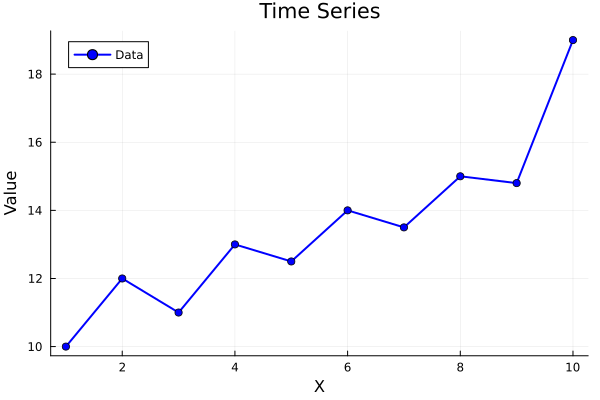

In [8]:
import Plots
using TimeSeriesKit

ts = TimeSeries([10.0, 12.0, 11.0, 13.0, 12.5, 14.0, 13.5, 15.0, 14.8, 19.0])
plot_timeseries(ts)

# Linear Regression

Is fitted? true
X Out of Sample: [6, 7, 8, 9, 10, 11, 12, 13]
Y Out of Sample: [13.500000000000002, 14.100000000000001, 14.700000000000003, 15.300000000000002, 15.900000000000002, 16.500000000000004, 17.1, 17.700000000000003]


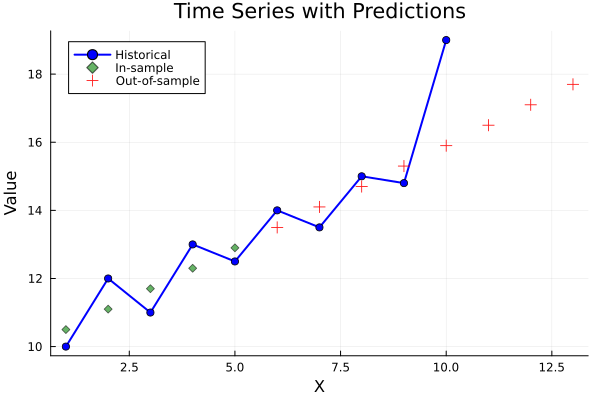

In [52]:
# Split data
train_ts = ts[1:5]
val_x = extrapolate_timestamps(train_ts, length(ts) - length(train_ts) + 3)

# Fit Linear Model
model_linear = LinearModel()
fit(model_linear, train_ts)
println("Is fitted? $(is_fitted(model_linear))")


# Predict ins-ample and out-of-sample
in_sample = predict(model_linear, train_ts.timestamps)
out_of_sample = predict(model_linear, val_x)
println("X Out of Sample: $(out_of_sample.timestamps)")
println("Y Out of Sample: $(out_of_sample.values)")

# Plot the forecast with predictions (TimeSeries)
plot_timeseries(ts, in_sample, out_of_sample)

### Iterative training  with sliding_window 3

Is fitted? true
X values: [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
Y Out of Sample: [13.999999999999993, 10.000000000000007, 15.0, 11.999999999999977, 15.499999999999986, 13.00000000000005, 16.49999999999996, 14.600000000000001, 23.200000000000298, 27.400000000000507, 31.60000000000071, 35.80000000000091]


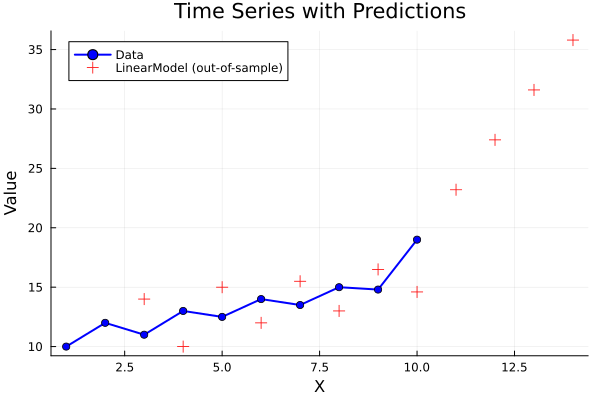

In [53]:

# Fit a linear model
model_linear = LinearModel(sliding_window=2)
fit(model_linear, ts)

println("Is fitted? $(is_fitted(model_linear))")

# Or predict at specific x values
out_of_sample = iterative_predict(model_linear, ts, 4)
println("X values: $(out_of_sample.timestamps)")
println("Y Out of Sample: $(out_of_sample.values)")

# Plot the forecast with predictions (TimeSeries)
plot_timeseries(ts, out_of_sample)

# Simple Exponential Smoothing

Optimized alpha: 0.8


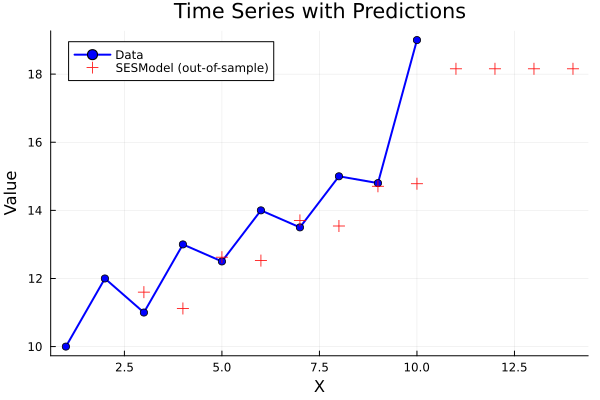

In [11]:
# Example with SES model

# Fit SES model (alpha will be optimized)
model_ses = SESModel()
fit(model_ses, ts)

println("Optimized alpha: ", model_ses.alpha)

# Forecast
predicted_ses = iterative_predict(model_ses, ts, 4)

# Plot
plot_timeseries(ts, predicted_ses)

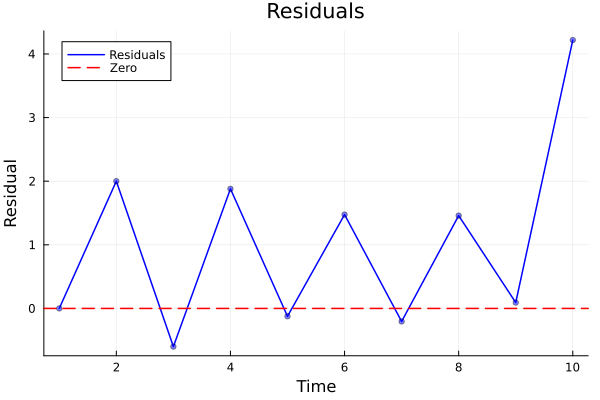

In [19]:
# Plot residuals
plot_residuals(model_ses)

# Auto Regression (AR(1))

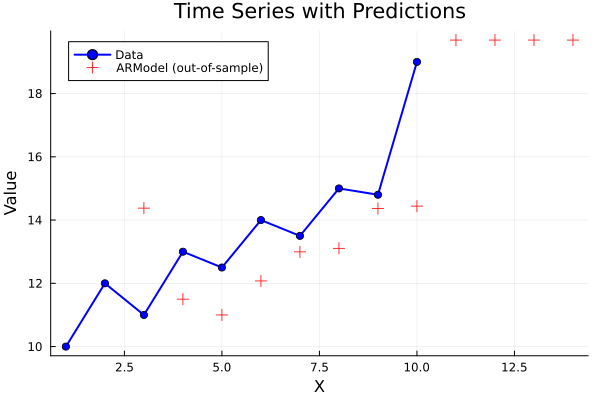

In [63]:
# Example with SES model

# Fit SES model (alpha will be optimized)
model_ar = ARModel(p=1)

# Forecast
predicted_ses = iterative_predict(model_ar, ts, 4)

# Plot
plot_timeseries(ts, predicted_ses)